┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


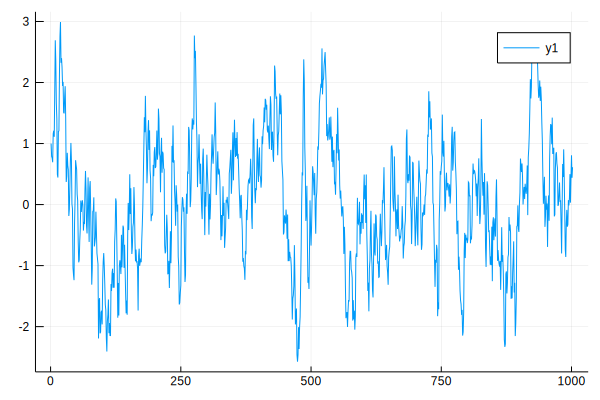

In [4]:
using DifferentialEquations
using Plots

μ = 0.0
σ = sqrt(2)
Θ = 1.0
W = OrnsteinUhlenbeckProcess(Θ,μ,σ,0.0,1.0)
prob = NoiseProblem(W,(0.0,100.0))
sol = solve(prob;dt=0.1)
plot(sol.u)

In [14]:
using Turing
using Distributions

@model ou(r,delta_t=0.1) = begin
    T = length(r)
    ampl ~ Uniform(0.0,5.0)
    tau ~ Uniform(0.0,5.0)
    
    b = exp(-delta_t/tau)
    
    r[1] ~ Normal(0,sqrt(ampl))
    for i=2:T
        r[i] ~ Normal(r[i-1]*b,sqrt(ampl*(1-b^2)))
    end
end

ou (generic function with 3 methods)

In [17]:
using StatsPlots

chn = sample(ou(sol.u,0.1), NUTS(0.65), 2000)

# Summarise results (currently requires the master branch from MCMCChains)
describe(chn)



┌ Info: Found initial step size
│   ϵ = 0.4
└ @ Turing.Inference /Users/hstrey/.julia/packages/Turing/LQFio/src/inference/hmc.jl:548
Sampling   0%|                               |  ETA: 0:13:36
  iterations:                    1
  n_steps:                       2
  is_accept:                     true
  acceptance_rate:               7.2959746188737895e-25
  log_density:                   -596.7076014160194
  hamiltonian_energy:            598.3775034243034
  hamiltonian_energy_error:      0.0
  max_hamiltonian_energy_error:  4304.347710859305
  tree_depth:                    1
  numerical_error:               true
  step_size:                     0.4
  nom_step_size:                 0.4
4m  mass_matrix:                   DiagEuclideanMetric([1.0, 1.0])┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfiniteθ = true
│   isfiniter = false
│   isfiniteℓπ = false
│   isfiniteℓκ = false
└ @ AdvancedHMC /Users/hstrey/.julia/packages/AdvancedHMC/y82Pj/src/hamil

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 3 columns
│ Row │ parameters                   │ mean        │ std         │ naive_se    │
│     │ Symbol                       │ Float64     │ Float64     │ Float64     │
├─────┼──────────────────────────────┼─────────────┼─────────────┼─────────────┤
│ 1   │ ampl                         │ 1.16033     │ 0.226879    │ 0.00717455  │
│ 2   │ hamiltonian_energy_error     │ -0.00518188 │ 0.628503    │ 0.019875    │
│ 3   │ max_hamiltonian_energy_error │ 1.19809     │ 3.36803     │ 0.106507    │
│ 4   │ nom_step_size                │ 0.0698802   │ 4.16542e-17 │ 1.31722e-18 │
│ 5   │ tau                          │ 1.20275     │ 0.242327    │ 0.00766305  │

Quantiles
. Omitted printing of 2 columns
│ Row │ parameters                   │ 2.5%      │ 25.0%     │ 50.0%     │
│     │ Symbol                       │ Float64   │ Float64   │ Float64   │
├─────┼──────────────────────────────┼───────────┼───────────┼───────────

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168


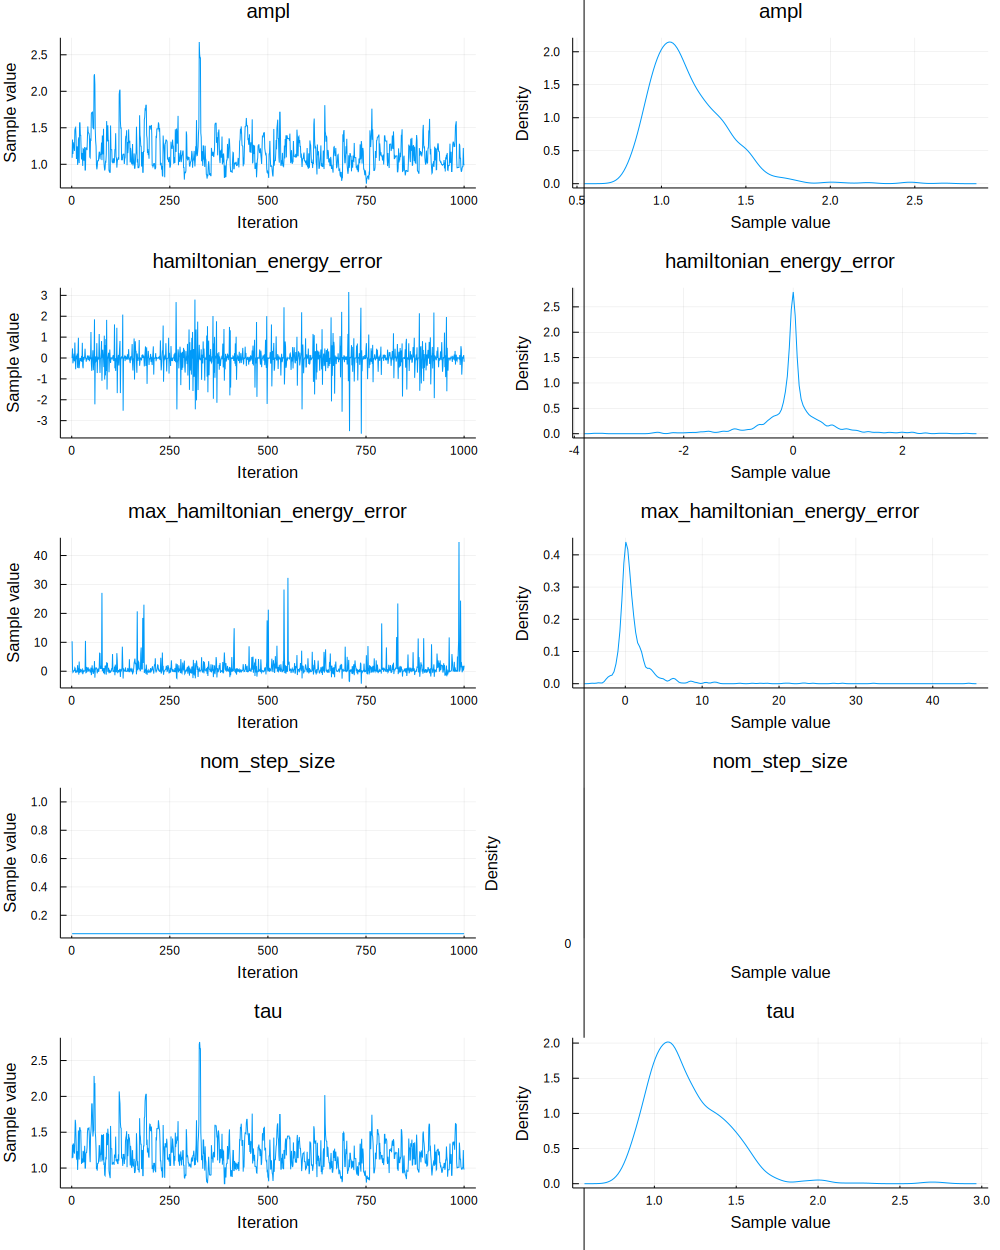

GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/hstrey/.julia/packages/PlotUtils/EybJR/src/ticks.jl:168
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW


In [19]:
# Plot and save results
p = plot(chn)